In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

**Load the Train data**

In [2]:
df = pd.read_csv(r"C:\Users\sahur\Downloads\KAGGLE\train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**Exploratory Data Analysis**

In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Unique value and value counts**

In [6]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [7]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [9]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [13]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [14]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [15]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
continuous = ['Age', 'Fare']
d_count = [ 'Survived', 'Pclass','SibSp','Parch']
d_categorical = ['Embarked','Sex']
unique_identifier = ['PassengerId','Name','Ticket', 'Cabin']

In [20]:
df[continuous].describe()

Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

In [21]:
df[continuous].skew()

Age     0.389108
Fare    4.787317
dtype: float64

In [22]:
df[d_categorical].describe()

Embarked   Sex
count       889   891
unique        3     2
top           S  male
freq        644   577

**Missing values**

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Duplicates**

In [24]:
df.duplicated().sum()

0

**Histogram**

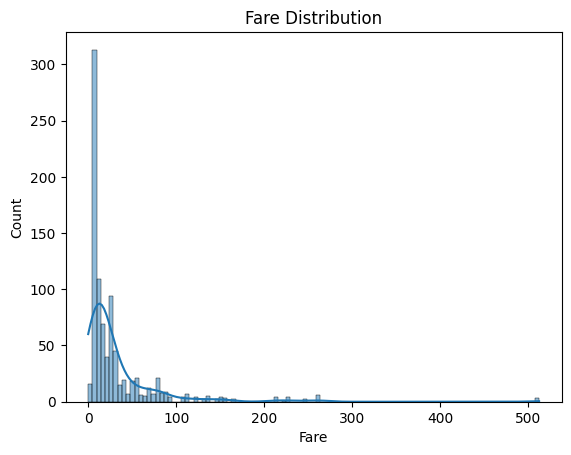

In [25]:
sns.histplot(x = df['Fare'],data = df ,kde = True)
plt.title('Fare Distribution')
plt.show()

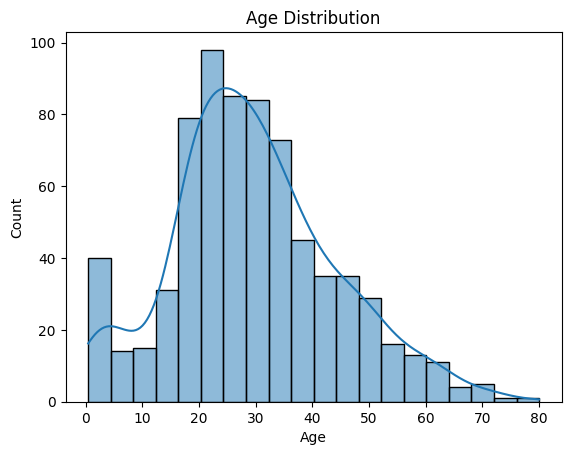

In [26]:
sns.histplot(x = df['Age'],kde = True)
plt.title('Age Distribution')
plt.show()

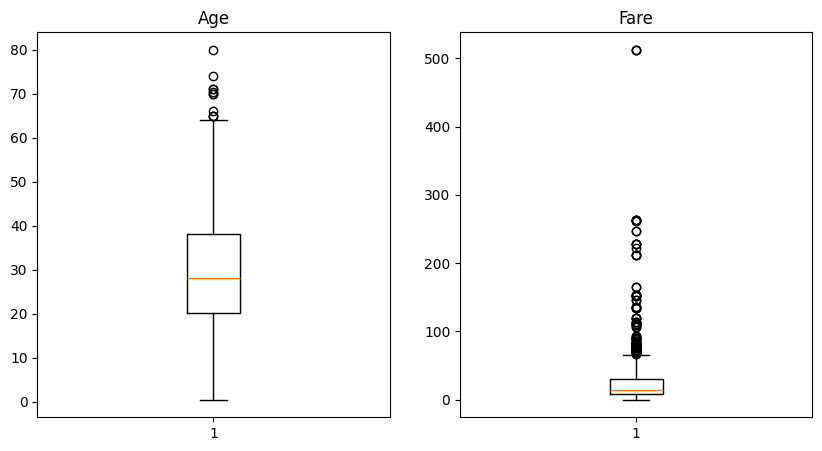

In [27]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

plt.boxplot(df['Age'].dropna())
plt.title('Age')
plt.subplot(1,2,2)
plt.boxplot(df['Fare'])
plt.title('Fare')
plt.show()

In [28]:
# AGE
Q1_age = df['Age'].quantile(.25)
Q3_age = df['Age'].quantile(.75)
IQR_age = Q3_age - Q1_age
upper_limit_age = Q3_age + 1.5 * IQR_age
lower_limit_age = Q1_age - 1.5 * IQR_age

df[(upper_limit_age<df['Age']) | (lower_limit_age >df['Age'])]

PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   male  65.0      0      1      113509  61.9792   B30        C  
96   male  71.0      0      0    PC 17754  34.6542    A5        C  
116  male  70.5      0      0      370369   7.7500   NaN        Q  
280  male  65.0      0      0      336439   7.7500   NaN        Q  
456  male  65.0      0      0       13509  26.5500   E38        S  
493  male  71.0      0      0    PC 17609  49.5042   NaN        C  
630  male  80.0      0      0       27042  30.0000   A23        S  
672  male  70.0      0      0  C.A. 24580  10.5000   NaN        S  
745  male  70.0      1      1   WE/P 5735  71.0000   B22        S  
851  male  74.0      0      0      347060   7.7750   NaN        S

In [29]:
# Step 1: Calculate Q1 and Q3
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Find outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

print(f"Number of Fare outliers: {outliers.shape[0]}")


Number of Fare outliers: 116


In [30]:
# FARE
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

upper_limit_fare =Q3_fare + 1.5 *IQR_fare
lower_limit_fare = Q1_fare - 1.5 * IQR_fare

df[(df['Fare'] < lower_limit_fare) | (df['Fare'] > upper_limit_fare)]
      

PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ...    ...   
846                           Sage, Mr. Douglas Bullen    male   NaN      8   
849       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female   NaN      1   
856         Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0      1   
863                  Sage, Miss. Dorothy Edith "Dolly"  female   NaN      8   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   

     Parch    Ticket      Fare        Cabin Embarked  
1        0  PC 17599   71.2833          C85        C  
27       2     19950  263.0000  C23 C25 C27        S  
31       0  PC 17569  146.5208          B78        C  
34       0  PC 17604   82.1708          NaN        C  
52       0  PC 17572   76.7292          D33        C  
..     ...       ...       ...          ...      ...  
846      2  CA. 2343   69.5500          NaN        S  
849      0     17453   89.1042          C92        C  
856      1     36928  164.8667          NaN        S  
863      2  CA. 2343   69.5500          NaN        S  
879      1     11767   83.1583          C50        C  

[116 rows x 12 columns]

**Data preprocessing**

**Data Cleaning**

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [32]:
df.drop(columns = ['Cabin'],axis = 1,inplace = True)

In [33]:
df.dropna(subset = ['Embarked'],axis = 0 ,inplace = True)

In [34]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket'],axis = 1,inplace= True)

**Data Transformation**

In [36]:
df['Fare'] = np.log(df['Fare'] +1)

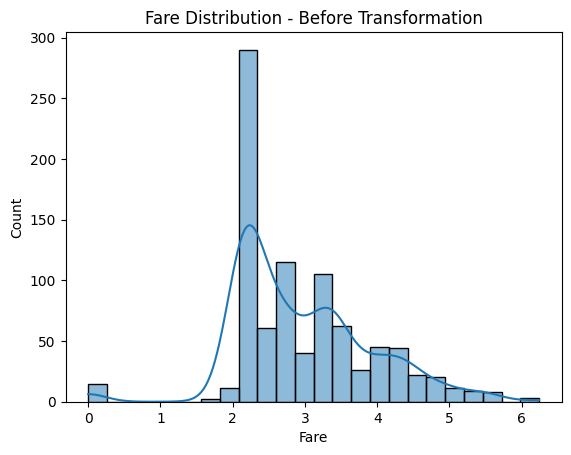

In [37]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution - Before Transformation')
plt.show()


In [38]:
df['Fare'].skew()

0.40010918935230094

**Outlier Treat**

In [39]:
df['Age'] = df['Age'].clip(lower = lower_limit_age ,upper = upper_limit_age)

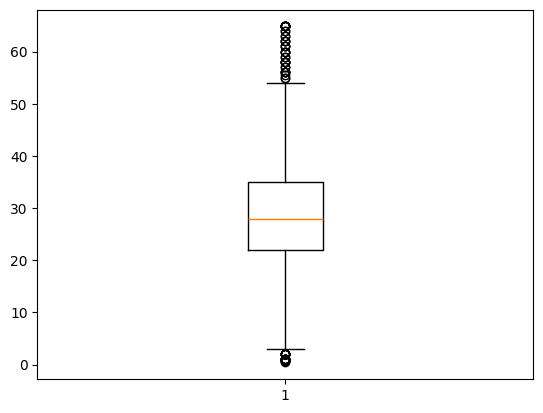

In [40]:
plt.boxplot(df['Age'])
plt.show()

In [41]:
print(df['Fare'].clip(lower = lower_limit_age,upper = upper_limit_age,inplace = True))

None


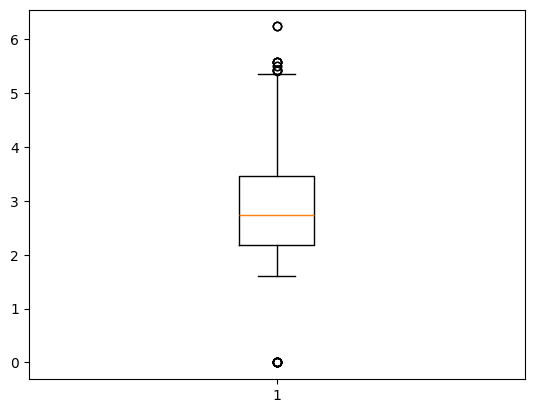

In [42]:
plt.boxplot(df['Fare'])
plt.show()

**Scaling on continuous columns**

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Age','Fare']] = sc.fit_transform(df[['Age','Fare']])
df

Survived  Pclass     Sex       Age  SibSp  Parch      Fare Embarked
0           0       3    male -0.567258      1      0 -0.877591        S
1           1       1  female  0.683970      1      0  1.366380        C
2           1       3  female -0.254451      0      0 -0.796281        S
3           1       1  female  0.449365      1      0  1.066796        S
4           0       3    male  0.449365      0      0 -0.781901        S
..        ...     ...     ...       ...    ...    ...       ...      ...
886         0       2    male -0.176249      0      0 -0.330815        S
887         1       1  female -0.801863      0      0  0.491068        S
888         0       3  female -0.098048      1      2  0.245663        S
889         1       1    male -0.254451      0      0  0.491068        C
890         0       3    male  0.214759      0      0 -0.816755        Q

[889 rows x 8 columns]

**Label Encoding on Categorical Data**

In [44]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
# encoding on Sex
df['Sex'] = le.fit_transform(df['Sex'])
# encoding on Embarked
df['Embarked'] = le.fit_transform(df['Embarked'])
df

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0           0       3    1 -0.567258      1      0 -0.877591         2
1           1       1    0  0.683970      1      0  1.366380         0
2           1       3    0 -0.254451      0      0 -0.796281         2
3           1       1    0  0.449365      1      0  1.066796         2
4           0       3    1  0.449365      0      0 -0.781901         2
..        ...     ...  ...       ...    ...    ...       ...       ...
886         0       2    1 -0.176249      0      0 -0.330815         2
887         1       1    0 -0.801863      0      0  0.491068         2
888         0       3    0 -0.098048      1      2  0.245663         2
889         1       1    1 -0.254451      0      0  0.491068         0
890         0       3    1  0.214759      0      0 -0.816755         1

[889 rows x 8 columns]

In [45]:
d_categorical

['Embarked', 'Sex']

In [46]:
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [47]:
X = df.drop(['Survived'],axis = 1)
y = df['Survived']

**Best Random State Number**

In [48]:
Train  = []
CV = []
for i in range(1,20):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = i)

    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(X_train,y_train)
    ypred_train = model.predict(X_train)
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model,X_train,y_train,cv = 5).mean())
    # em → evaluation_metrics,  gm → good_models,  rs → best_random_state
    em = pd.DataFrame({'Train':Train,'CV':CV})
    
    gm = em[abs(em['Train'] - em['CV'])<=0.5]
    
    rs= gm[gm['CV'] ==  gm['CV'].max()].index.tolist()[0]

rs


5

In [49]:
df.to_csv('cleaned_train.csv',index = False)